In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [51]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Carbon Taxes

In [246]:
# Plot carbon tax effects
start_t = 336
taxtype='carbon'
n_per_taxtype = 30
taxrates = np.round(np.arange(0.1, 0.6, step=0.1), 1)
all_dfs = {tr: [] for tr in taxrates}
all_dfs[0.0] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_{tr}_{i}.csv'))
    all_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/valoutput_{i}.csv'))

taxrates = np.round(np.arange(0.0, 0.6, step=0.1), 1)

In [247]:
def get_avg_perc(indicator, ax):

    data = np.array([[df[indicator].iloc[start_t:] for df in all_dfs[tr]] for tr in taxrates])

    # print(data.shape)

    averages = np.array([np.mean([df[indicator].iloc[start_t:] for df in all_dfs[tr]]) for tr in taxrates])
    perc_75 = np.array([np.percentile([df[indicator].iloc[start_t:] for df in all_dfs[tr]], [12.5, 81.5]) for tr in taxrates])
    stds = np.array([np.std([df[indicator].iloc[start_t:] for df in all_dfs[tr]]) for tr in taxrates])

    ax.plot(taxrates, averages, c='red')

    ax.plot(taxrates, averages + stds, c='red', linestyle='dotted', alpha=0.5)
    ax.plot(taxrates, averages - stds, c='red', linestyle='dotted', alpha=0.5)
    ax.fill_between(taxrates, averages - stds, averages + stds, color='red', alpha=0.2)

    return ax

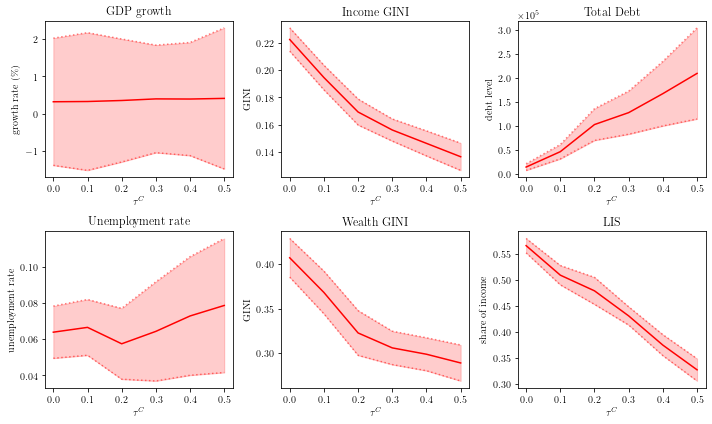

In [248]:
fig, [[ax1, ax3, ax5], [ax2, ax4, ax6]] = plt.subplots(2, 3, figsize=(10, 6))

ax1 = get_avg_perc('GDP_growth', ax1)
ax1.set_title('GDP growth')
ax1.set_xlabel('$\\tau^C$')
ax1.set_ylabel('growth rate (\%)')
# ax1.set_ylim(0, 1)

ax2 = get_avg_perc('U', ax2)
ax2.set_title('Unemployment rate')
ax2.set_xlabel('$\\tau^C$')
ax2.set_ylabel('unemployment rate')
# ax2.set_ylim(0, 0.15)

ax3 = get_avg_perc("GINI_I", ax3)
ax3.set_title('Income GINI')
ax3.set_xlabel('$\\tau^C$')
ax3.set_ylabel('GINI')

ax4 = get_avg_perc("GINI_W", ax4)
ax4.set_title('Wealth GINI')
ax4.set_xlabel('$\\tau^C$')
ax4.set_ylabel('GINI')

ax5 = get_avg_perc("TotDebt", ax5)
ax5.set_title('Total Debt')
ax5.set_xlabel('$\\tau^C$')
ax5.set_ylabel('debt level')
ax5.ticklabel_format(axis='y', style='sci', scilimits=(-3, 5))

ax6 = get_avg_perc("LIS", ax6)
ax6.set_title('LIS')
ax6.set_xlabel('$\\tau^C$')
ax6.set_ylabel('share of income')

plt.tight_layout()
plt.savefig('experiments/carbontax_social.pdf', bbox_inches='tight')
plt.show()

In [249]:
# Plot carbon tax effects
taxtype='carbon'
n_per_taxtype = 30
taxrates = np.round(np.arange(0.1, 0.6, step=0.1), 1)
all_hh_dfs = {tr: [] for tr in taxrates}
all_hh_dfs[0.0] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_hh_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_householddata_{tr}_{i}.csv'))
    all_hh_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/householddata_{i}.csv'))

In [250]:
def compute_I_changes(tr):
    
    I_mean_20_tax = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
    I_mean_80_tax = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
    I_mean_100_tax = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])

    I_mean_20_notax = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
    I_mean_80_notax = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
    I_mean_100_notax = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])

    return I_mean_20_tax, I_mean_80_tax, I_mean_100_tax, I_mean_20_notax, I_mean_80_notax, I_mean_100_notax

In [251]:
def compute_W_changes(tr):

    W_mean_20_tax = np.array([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
    W_mean_80_tax = np.array([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
    W_mean_100_tax = np.array([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])

    W_mean_20_notax = np.array([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
    W_mean_80_notax = np.array([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
    W_mean_100_notax = np.array([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])

    return W_mean_20_tax, W_mean_80_tax, W_mean_100_tax,  W_mean_20_notax, W_mean_80_notax, W_mean_100_notax

In [252]:
def plot_mean_I_change(tr, ax):
    I_mean_20_tax, I_mean_80_tax, I_mean_100_tax, I_mean_20_notax, I_mean_80_notax, I_mean_100_notax = compute_I_changes(tr)

    perc_75 = np.percentile(I_mean_20_tax / I_mean_20_notax, [12.5, 81.5], axis=0) - 1
    mean_I_20 = np.mean(I_mean_20_tax / I_mean_20_notax, axis=0) - 1
    
    ax.plot(mean_I_20, c='red', label='$I$ lowest 20\%')
    ax.plot(np.transpose(perc_75), c='red', linestyle='dotted', alpha=0.5)
    ax.fill_between(range(len(perc_75[0])), perc_75[0], perc_75[1], color='red', alpha=0.1)

    perc_75 = np.percentile(I_mean_80_tax / I_mean_80_notax, [12.5, 81.5], axis=0) - 1
    mean_I_80 = np.mean(I_mean_80_tax / I_mean_80_notax, axis=0) - 1
    
    ax.plot(mean_I_80, c='blue', label='$I$ middle 60\%')
    ax.plot(np.transpose(perc_75), c='blue', linestyle='dotted', alpha=0.5)
    ax.fill_between(range(len(perc_75[0])), perc_75[0], perc_75[1], color='blue', alpha=0.1)

    perc_75 = np.percentile(I_mean_100_tax / I_mean_100_notax, [12.5, 81.5], axis=0) - 1
    mean_I_100 = np.mean(I_mean_100_tax / I_mean_100_notax, axis=0) - 1
    
    ax.plot(mean_I_100, c='green', label='$I$ top 20\%')
    ax.plot(np.transpose(perc_75), c='green', linestyle='dotted', alpha=0.5)
    ax.fill_between(range(len(perc_75[0])), perc_75[0], perc_75[1], color='green', alpha=0.1)

    ax.axhline(0, linestyle='dashed', c='black')
    ax.legend()

    return ax

In [253]:
def plot_mean_W_change(tr, ax):
    W_mean_20_tax, W_mean_80_tax, W_mean_100_tax,  W_mean_20_notax, W_mean_80_notax, W_mean_100_notax = compute_W_changes(tr)

    perc_75 = np.percentile(W_mean_20_tax / W_mean_20_notax, [12.5, 81.5], axis=0) - 1
    mean_W_20 = np.mean(W_mean_20_tax / W_mean_20_notax, axis=0) - 1
    
    ax.plot(mean_W_20, c='red', label='$W$ lowest 20\%')
    ax.plot(np.transpose(perc_75), c='red', linestyle='dotted', alpha=0.5)
    ax.fill_between(range(len(perc_75[0])), perc_75[0], perc_75[1], color='red', alpha=0.1)

    perc_75 = np.percentile(W_mean_80_tax / W_mean_80_notax, [12.5, 81.5], axis=0) - 1
    mean_W_80 = np.mean(W_mean_80_tax / W_mean_80_notax, axis=0) - 1
    
    ax.plot(mean_W_80, c='blue', label='$W$ middle 60\%')
    ax.plot(np.transpose(perc_75), c='blue', linestyle='dotted', alpha=0.5)
    ax.fill_between(range(len(perc_75[0])), perc_75[0], perc_75[1], color='blue', alpha=0.1)

    perc_75 = np.percentile(W_mean_100_tax / W_mean_100_notax, [12.5, 81.5], axis=0) - 1
    mean_W_100 = np.mean(W_mean_100_tax / W_mean_100_notax, axis=0) - 1

    ax.plot(mean_W_100, c='green', label='$W$ top 20\%')
    ax.plot(np.transpose(perc_75), c='green', linestyle='dotted', alpha=0.5)
    ax.fill_between(range(len(perc_75[0])), perc_75[0], perc_75[1], color='green', alpha=0.1)

    ax.axhline(0, linestyle='dashed', c='black')
    ax.legend()

    return ax

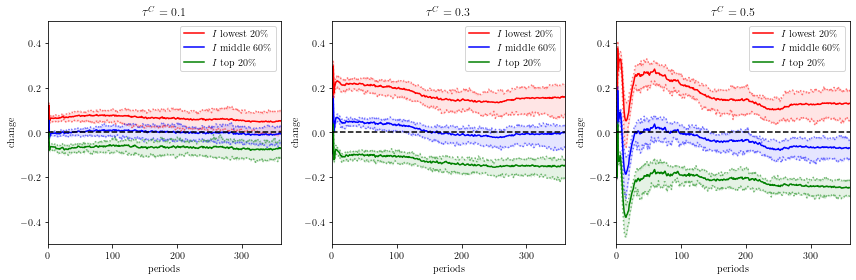

In [254]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

plt.setp(ax, xlabel='periods', ylabel='change', ylim=(-0.5, 0.5), xlim=(0, 360))

ax[0] = plot_mean_I_change(0.1, ax[0])
ax[0].set_title('$\\tau^C=0.1$')

ax[1] = plot_mean_I_change(0.3, ax[1])
ax[1].set_title('$\\tau^C=0.3$')

ax[2] = plot_mean_I_change(0.5, ax[2])
ax[2].set_title('$\\tau^C=0.5$')

plt.tight_layout()
plt.savefig('experiments/carbontax_income.pdf', bbox_inches='tight')
plt.show()

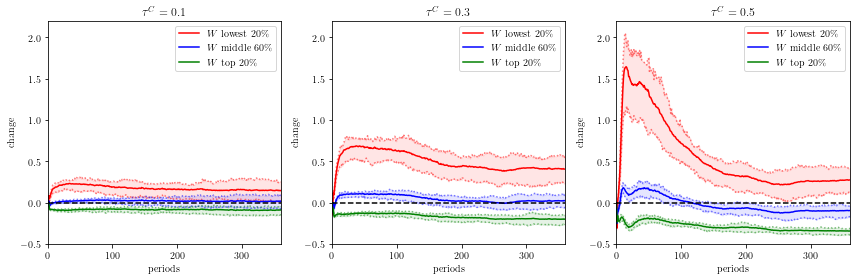

In [255]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

plt.setp(ax, xlabel='periods', ylabel='change', ylim=(-0.5, 2.2), xlim=(0, 360))

ax[0] = plot_mean_W_change(0.1, ax[0])
ax[0].set_title('$\\tau^C=0.1$')

ax[1] = plot_mean_W_change(0.3, ax[1])
ax[1].set_title('$\\tau^C=0.3$')

ax[2] = plot_mean_W_change(0.5, ax[2])
ax[2].set_title('$\\tau^C=0.5$')

plt.tight_layout()
plt.savefig('experiments/carbontax_wealth.pdf', bbox_inches='tight')
plt.show()

In [256]:
def plot_em_path(tr, ax):

    data = np.array([df.EmIndex.iloc[300:] for df in all_dfs[tr]])
    meanEm = np.mean(data, axis=0)
    percEm = np.percentile([df.EmIndex.iloc[300:] for df in all_dfs[tr]], [12.5, 81.5], axis=0)
    # res = stats.bootstrap((data, ), np.std, method='percentile', axis=0)
    # lower = res.confidence_interval.low
    # upper = res.confidence_interval.high
    ax.plot(meanEm, c='blue')
    ax.fill_between(range(len(meanEm)), percEm[0], percEm[1], color='blue', alpha=0.2)
    ax.plot(percEm[0], color='blue', alpha=0.5, linestyle='dotted')
    ax.plot(percEm[1], color='blue', alpha=0.5, linestyle='dotted')

    return ax

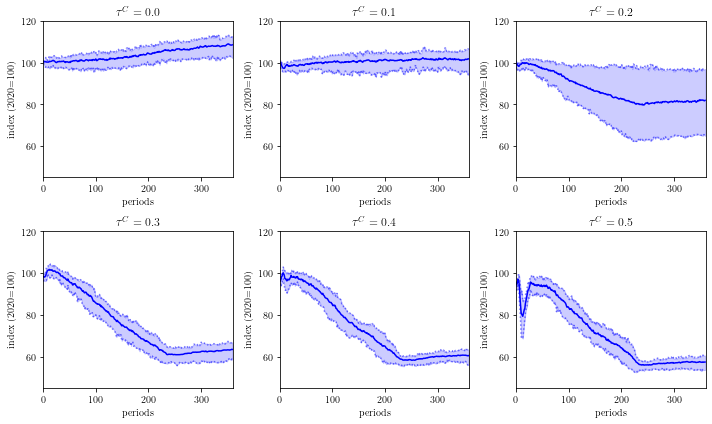

In [257]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

plt.setp(ax, xlabel='periods', ylabel='index (2020=100)', ylim=(45, 120), xlim=(0, 360))

ax[0,0] = plot_em_path(0.0, ax[0,0])
ax[0,0].set_title('$\\tau^C=0.0$')

ax[0,1] = plot_em_path(0.1, ax[0,1])
ax[0,1].set_title('$\\tau^C=0.1$')

ax[0,2] = plot_em_path(0.2, ax[0,2])
ax[0,2].set_title('$\\tau^C=0.2$')

ax[1,0] = plot_em_path(0.3, ax[1,0])
ax[1,0].set_title('$\\tau^C=0.3$')

ax[1,1] = plot_em_path(0.4, ax[1,1])
ax[1,1].set_title('$\\tau^C=0.4$')

ax[1,2] = plot_em_path(0.5, ax[1,2])
ax[1,2].set_title('$\\tau^C=0.5$')

plt.tight_layout()
plt.savefig('experiments/carbontax_emissions.pdf', bbox_inches='tight')
plt.show()

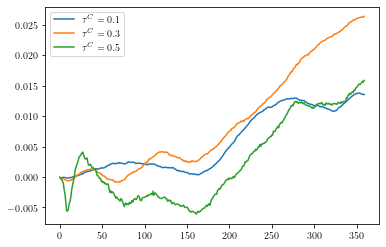

In [258]:
# avg_π_EE,avg_π_EF

A_ee_00 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.0]], axis=0)
A_ee_01 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.1]], axis=0)
# A_em_02 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.2]], axis=0)
A_ee_03 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.3]], axis=0)
# A_em_04 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.4]], axis=0)
A_ee_05 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.5]], axis=0)

plt.plot(A_ee_01 / A_ee_00 - 1, label='$\\tau^C=0.1$')
plt.plot(A_ee_03 / A_ee_00 - 1, label='$\\tau^C=0.3$')
plt.plot(A_ee_05 / A_ee_00 - 1, label='$\\tau^C=0.5$')

plt.legend()
plt.show()


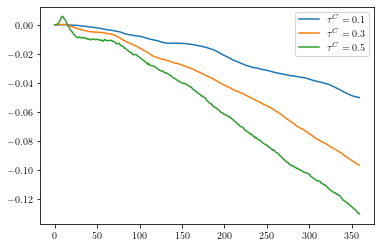

In [259]:
A_ef_00 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[0.0]], axis=0)
A_ef_01 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[0.1]], axis=0)
# A_em_02 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.2]], axis=0)
A_ef_03 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[0.3]], axis=0)
# A_em_04 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.4]], axis=0)
A_ef_05 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[0.5]], axis=0)

plt.plot(A_ef_01 / A_ef_00 - 1, label='$\\tau^C=0.1$')
plt.plot(A_ef_03 / A_ef_00 - 1, label='$\\tau^C=0.3$')
plt.plot(A_ef_05 / A_ef_00 - 1, label='$\\tau^C=0.5$')

plt.legend()
plt.show()

## Energy Tax

In [275]:
# Plot carbon tax effects
start_t = 336
taxtype='energy'
n_per_taxtype = 30
# taxrates = np.round(np.arange(0.1, 0.7, step=0.15), 2)
taxrates = [0.1, 0.25, 0.4, 0.55, 0.7]
all_dfs = {tr: [] for tr in taxrates}
all_dfs[0.00] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_{tr}_{i}.csv'))
    all_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/valoutput_{i}.csv'))

# taxrates = np.round(np.arange(0.0, 0.7, step=0.15), 2)


In [276]:
# Plot carbon tax effects
# taxtype='carbon'
n_per_taxtype = 30
# taxrates = np.round(np.arange(0.1, 0.6, step=0.1), 1)
all_hh_dfs = {tr: [] for tr in taxrates}
all_hh_dfs[0.0] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_hh_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_householddata_{tr}_{i}.csv'))
    all_hh_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/householddata_{i}.csv'))

In [278]:
taxrates = [0.0, 0.10, 0.25, 0.40, 0.55, 0.70]

In [279]:
# def get_avg_perc(indicator, ax):
    
#     data = np.array([[df[indicator].iloc[start_t:] for df in all_dfs[tr]] for tr in taxrates])

#     # print(data.shape)

#     averages = np.array([np.mean([df[indicator].iloc[start_t:] for df in all_dfs[tr]]) for tr in taxrates])
#     perc_75 = np.array([np.percentile([df[indicator].iloc[start_t:] for df in all_dfs[tr]], [12.5, 81.5]) for tr in taxrates])
#     stds = np.array([np.std([df[indicator].iloc[start_t:] for df in all_dfs[tr]]) for tr in taxrates])

#     ax.plot(taxrates, averages, c='red')

#     ax.plot(taxrates, averages + stds, c='red', linestyle='dotted', alpha=0.5)
#     ax.plot(taxrates, averages - stds, c='red', linestyle='dotted', alpha=0.5)
#     ax.fill_between(taxrates, averages - stds, averages + stds, color='red', alpha=0.2)

#     return ax

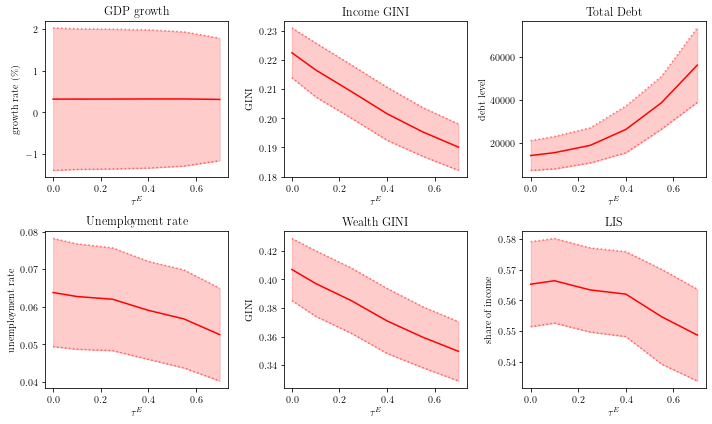

In [280]:
fig, [[ax1, ax3, ax5], [ax2, ax4, ax6]] = plt.subplots(2, 3, figsize=(10, 6))

ax1 = get_avg_perc('GDP_growth', ax1)
ax1.set_title('GDP growth')
ax1.set_xlabel('$\\tau^E$')
ax1.set_ylabel('growth rate (\%)')
# ax1.set_ylim(0, 1)

ax2 = get_avg_perc('U', ax2)
ax2.set_title('Unemployment rate')
ax2.set_xlabel('$\\tau^E$')
ax2.set_ylabel('unemployment rate')
# ax2.set_ylim(0, 0.15)

ax3 = get_avg_perc("GINI_I", ax3)
ax3.set_title('Income GINI')
ax3.set_xlabel('$\\tau^E$')
ax3.set_ylabel('GINI')

ax4 = get_avg_perc("GINI_W", ax4)
ax4.set_title('Wealth GINI')
ax4.set_xlabel('$\\tau^E$')
ax4.set_ylabel('GINI')

ax5 = get_avg_perc("TotDebt", ax5)
ax5.set_title('Total Debt')
ax5.set_xlabel('$\\tau^E$')
ax5.set_ylabel('debt level')
ax5.ticklabel_format(axis='y', style='sci', scilimits=(-3, 5))

ax6 = get_avg_perc("LIS", ax6)
ax6.set_title('LIS')
ax6.set_xlabel('$\\tau^E$')
ax6.set_ylabel('share of income')

plt.tight_layout()
plt.savefig('experiments/energytax_social.pdf', bbox_inches='tight')
plt.show()

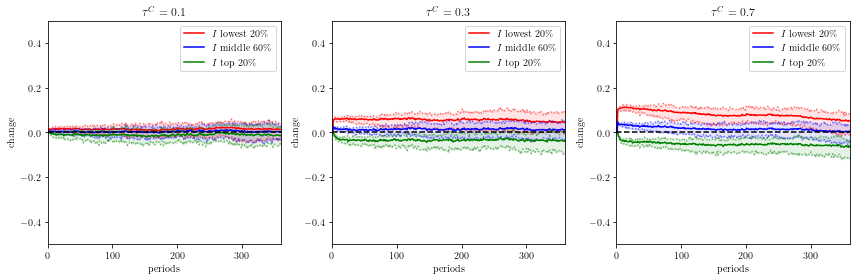

In [281]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

plt.setp(ax, xlabel='periods', ylabel='change', ylim=(-0.5, 0.5), xlim=(0, 360))

ax[0] = plot_mean_I_change(0.1, ax[0])
ax[0].set_title('$\\tau^C=0.1$')

ax[1] = plot_mean_I_change(0.4, ax[1])
ax[1].set_title('$\\tau^C=0.3$')

ax[2] = plot_mean_I_change(0.7, ax[2])
ax[2].set_title('$\\tau^C=0.7$')

plt.tight_layout()
plt.savefig('experiments/energytax_income.pdf', bbox_inches='tight')
plt.show()

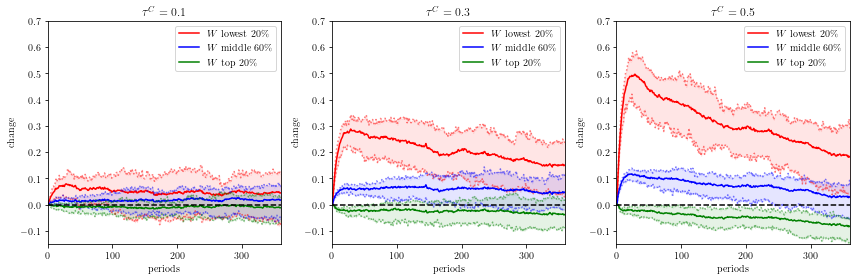

In [286]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

plt.setp(ax, xlabel='periods', ylabel='change', ylim=(-0.15, 0.7), xlim=(0, 360))

ax[0] = plot_mean_W_change(0.1, ax[0])
ax[0].set_title('$\\tau^C=0.1$')

ax[1] = plot_mean_W_change(0.4, ax[1])
ax[1].set_title('$\\tau^C=0.3$')

ax[2] = plot_mean_W_change(0.7, ax[2])
ax[2].set_title('$\\tau^C=0.5$')

plt.tight_layout()
plt.savefig('experiments/energytax_wealth.pdf', bbox_inches='tight')
plt.show()

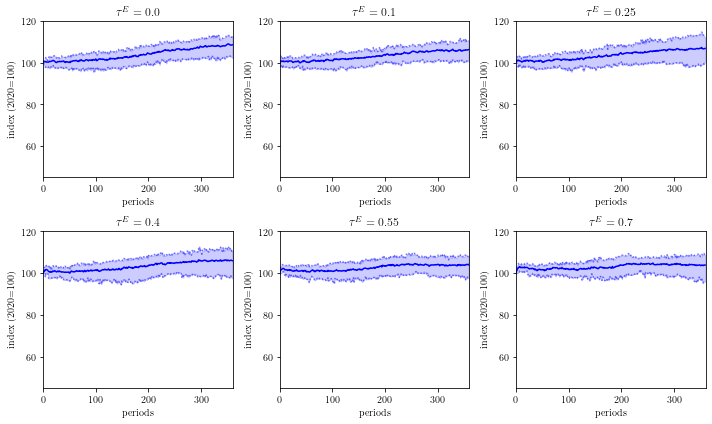

In [263]:
def plot_em_path(tr, ax):
    
    data = np.array([df.EmIndex.iloc[300:] for df in all_dfs[tr]])
    meanEm = np.mean(data, axis=0)
    percEm = np.percentile([df.EmIndex.iloc[300:] for df in all_dfs[tr]], [12.5, 81.5], axis=0)
    # res = stats.bootstrap((data, ), np.std, method='percentile', axis=0)
    # lower = res.confidence_interval.low
    # upper = res.confidence_interval.high
    ax.plot(meanEm, c='blue')
    ax.fill_between(range(len(meanEm)), percEm[0], percEm[1], color='blue', alpha=0.2)
    ax.plot(percEm[0], color='blue', alpha=0.5, linestyle='dotted')
    ax.plot(percEm[1], color='blue', alpha=0.5, linestyle='dotted')

    return ax

fig, ax = plt.subplots(2, 3, figsize=(10, 6))

plt.setp(ax, xlabel='periods', ylabel='index (2020=100)', ylim=(45, 120), xlim=(0, 360))

ax[0,0] = plot_em_path(0.0, ax[0,0])
ax[0,0].set_title('$\\tau^E=0.0$')

ax[0,1] = plot_em_path(0.1, ax[0,1])
ax[0,1].set_title('$\\tau^E=0.1$')

ax[0,2] = plot_em_path(0.25, ax[0,2])
ax[0,2].set_title('$\\tau^E=0.25$')

# ax[1,0] = plot_em_path(0.3, ax[1,0])
# ax[1,0].set_title('$\\tau^E=0.3$')

ax[1,0] = plot_em_path(0.4, ax[1,0])
ax[1,0].set_title('$\\tau^E=0.4$')

ax[1,1] = plot_em_path(0.55, ax[1,1])
ax[1,1].set_title('$\\tau^E=0.55$')

ax[1,2] = plot_em_path(0.7, ax[1,2])
ax[1,2].set_title('$\\tau^E=0.7$')

plt.tight_layout()
plt.savefig('experiments/energytax_emissions.pdf', bbox_inches='tight')
plt.show()

## Price fossil fuels shock

In [67]:
# Plot carbon tax effects
n_per_pf = 10
# pfs = np.round(np.arange(0.1, 0.6, step=0.1), 1)
pfs = [0.1, 0.3]
all_hh_pf_dfs = {p_f: [] for p_f in pfs}
all_pf_dfs = {p_f: [] for p_f in pfs}

for i in range(1, n_per_pf + 1):
    for p_f in pfs:
        all_pf_dfs[p_f].append(pd.read_csv(f'../results/experiments/OFAT_experiments/p_f_{p_f}_420_{i}.csv'))
        all_hh_pf_dfs[p_f].append(pd.read_csv(f'../results/experiments/OFAT_experiments/p_f_{p_f}_420_householddata_{i}.csv'))

In [190]:
def plot_pf_W(p_f, ax, lowersubplot=False):

    W_20_01 = np.array([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    W_20_02 = np.array([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    W_mean_20_01 = np.mean(W_20_01 / W_20_02, axis=0) - 1
    perc75 = np.percentile(W_20_01 / W_20_02, [12.5, 81.5], axis=0) -1

    ax.plot(W_mean_20_01, color='red', label='$W$ lower $20\%$')
    # ax.fill_between(range(len(W_mean_20_01)), perc75[0], perc75[1], color='red', alpha=0.5,zorder=10)

    W_80_01 = np.array([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    W_80_02 = np.array([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    W_mean_80_01 = np.mean(W_80_01 / W_80_02, axis=0) - 1
    perc75 = np.percentile(W_80_01 / W_80_02, [12.5, 81.5], axis=0) -1

    ax.plot(W_mean_80_01, color='blue', label='$W$ middle $20\%$')
    # ax.fill_between(range(len(W_mean_20_01)), perc75[0], perc75[1], color='blue', alpha=0.5, zorder=10)

    W_100_01 = np.array([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    W_100_02 = np.array([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    W_mean_100_01 = np.mean(W_100_01 / W_100_02, axis=0) - 1
    perc75 = np.percentile(W_100_01 / W_100_02, [12.5, 81.5], axis=0) -1

    ax.plot(W_mean_100_01, color='green', label='$W$ upper $20\%$')
    # ax.fill_between(range(len(W_mean_100_01)), perc75[0], perc75[1], color='green', alpha=0.5, zorder=10)

    ax.axvline(120, color='black', linestyle='dotted', alpha=0.5)
    ax.axvline(132, color='black', linestyle='dotted', alpha=0.5)
    ax.axvspan(120, 132, color='black', alpha=0.2, zorder=1, label='shock')
    ax.axhline(0, linestyle='dashed', color='black', alpha=0.5)
    # ax.legend()

    if not lowersubplot:
        axins = ax.inset_axes([0.5, 0.47, 0.47, 0.5])
        axins.set_ylim(-0.04, 0.25)
    else:
        axins = ax.inset_axes([0.5, 0.07, 0.47, 0.5])
        axins.set_ylim(-0.2, 0.04)
    axins.plot(np.arange(118, 151), W_mean_20_01[118:151], color='red')
    axins.plot(np.arange(118, 151), W_mean_80_01[118:151], color='blue')
    axins.plot(np.arange(118, 151), W_mean_100_01[118:151], color='green')
    axins.axvspan(120, 132, color='black', alpha=0.1, zorder=1, label='shock')
    axins.axvline(120, color='black', linestyle='dotted', alpha=0.5)
    axins.axvline(132, color='black', linestyle='dotted', alpha=0.5)
    axins.axhline(0, color='black', linestyle='dashed', alpha=0.5)
    axins.set_xlim(118, 150)

    return ax

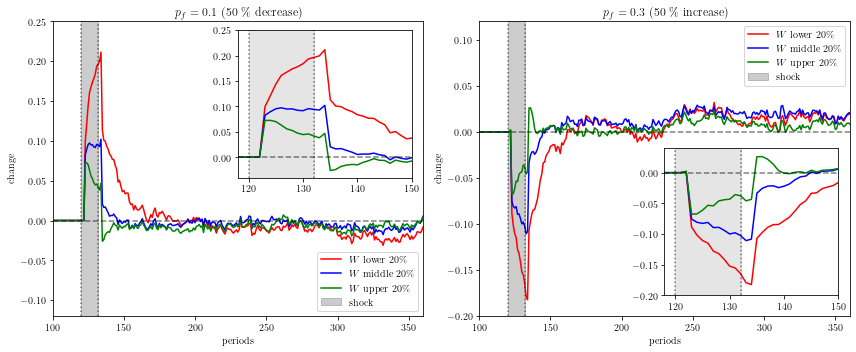

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plt.setp(ax, xlabel='periods', ylabel='change', xlim=(100, 360))

ax[0] = plot_pf_W(0.1, ax[0])
ax[0].set_title('$p_f=0.1$ (50 \%  decrease)')
ax[0].set_ylim(-0.12, 0.25)
ax[0].legend(loc='lower right')

ax[1] = plot_pf_W(0.3, ax[1], lowersubplot=True)
ax[1].set_title('$p_f=0.3$ (50 \%  increase)')
ax[1].set_ylim(-0.2, 0.12)
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.savefig('experiments/pf_shock_wealth.pdf', bbox_inches='tight')
plt.show()

In [188]:
def plot_pf_I(p_f, ax, lowersubplot=False):

    I_20_01 = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    I_20_02 = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    I_mean_20_01 = np.mean(I_20_01 / I_20_02, axis=0) - 1
    perc75 = np.percentile(I_20_01 / I_20_02, [12.5, 81.5], axis=0) -1

    ax.plot(I_mean_20_01, color='red', label='$I$ lower $20\%$')
    # ax.fill_between(range(len(W_mean_20_01)), perc75[0], perc75[1], color='red', alpha=0.5,zorder=10)

    I_80_01 = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    I_80_02 = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    I_mean_80_01 = np.mean(I_80_01 / I_80_02, axis=0) - 1
    perc75 = np.percentile(I_80_01 / I_80_02, [12.5, 81.5], axis=0) -1

    ax.plot(I_mean_80_01, color='blue', label='$I$ middle $20\%$')
    # ax.fill_between(range(len(W_mean_20_01)), perc75[0], perc75[1], color='blue', alpha=0.5, zorder=10)

    I_100_01 = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    I_100_02 = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    I_mean_100_01 = np.mean(I_100_01 / I_100_02, axis=0) - 1
    perc75 = np.percentile(I_100_01 / I_100_02, [12.5, 81.5], axis=0) -1

    ax.plot(I_mean_100_01, color='green', label='$I$ upper $20\%$')
    # ax.fill_between(range(len(W_mean_100_01)), perc75[0], perc75[1], color='green', alpha=0.5, zorder=10)

    ax.axvline(120, color='black', linestyle='dotted', alpha=0.5)
    ax.axvline(132, color='black', linestyle='dotted', alpha=0.5)
    ax.axvspan(120, 132, color='black', alpha=0.1, zorder=1, label='shock')
    ax.axhline(0, linestyle='dashed', color='black', alpha=0.5)

    if not lowersubplot:
        axins = ax.inset_axes([0.5, 0.58, 0.47, 0.4])
        axins.set_ylim(-0.06, 0.08)
    else:
        axins = ax.inset_axes([0.5, 0.05, 0.47, 0.4])
        axins.set_ylim(-0.08, 0.06)
    axins.plot(np.arange(118, 151), I_mean_20_01[118:151], color='red', label='$I$ lower $20\%$')
    axins.plot(np.arange(118, 151), I_mean_80_01[118:151], color='blue', label='$I$ middle $20\%$')
    axins.plot(np.arange(118, 151), I_mean_100_01[118:151], color='green', label='$I$ upper $20\%$')
    axins.axvspan(120, 132, color='black', alpha=0.1, zorder=1, label='shock')
    axins.axvline(120, color='black', linestyle='dotted', alpha=0.5)
    axins.axvline(132, color='black', linestyle='dotted', alpha=0.5)
    axins.set_xlim(118, 150)
    axins.axhline(0, color='black', linestyle='dashed', alpha=0.5)

    return ax

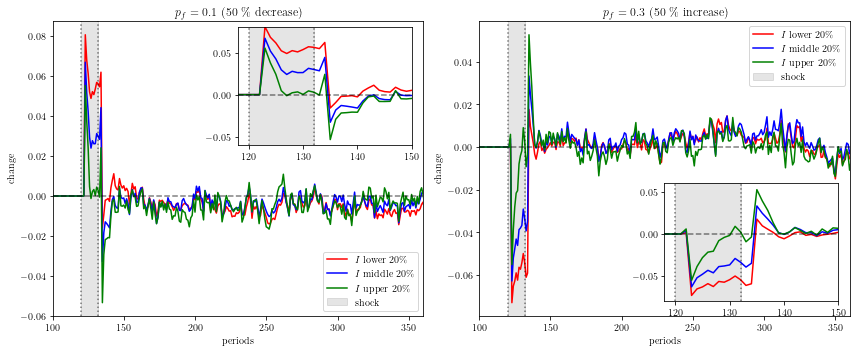

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plt.setp(ax, xlabel='periods', ylabel='change', xlim=(100, 360))

ax[0] = plot_pf_I(0.1, ax[0])
ax[0].set_title('$p_f=0.1$ (50 \%  decrease)')
ax[0].legend(loc='lower right')

ax[1] = plot_pf_I(0.3, ax[1], lowersubplot=True)
ax[1].set_title('$p_f=0.3$ (50 \%  increase)')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.savefig('experiments/pf_shock_income.pdf', bbox_inches='tight')
plt.show()

In [ ]:
def build_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=2, 
              ylims=None, n_per_taxtype=10):

    # Open dataframes
    all_dfs = {}
    for i in range(n_per_taxtype):
        all_dfs.append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax.csv'))

    fig, ax = plt.subplots(1, n, figsize=(5*n,4))

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    for i, indicator, title, ylabel, xlabel in zip(range(n), indicators, plottitles, ylabels, xlabels):
        
        mean = df.groupby('taxrate', as_index=False)[indicator].mean()
        std = df.groupby('taxrate', as_index=False)[indicator].std()

        ax[i].plot(mean['taxrate'], mean[indicator])
        ax[i].fill_between(mean['taxrate'], 
                           mean[indicator] + std[indicator], 
                           mean[indicator] - std[indicator], alpha=0.5)
        ax[i].set_title(title)
        ax[i].set_xlabel(xlabel)
        ax[i].set_ylabel(ylabel)

        if ylims != None:
            ax[i].set_ylim(ylims[i])
        
    return ax, mean

In [73]:
def n_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=2):
    
    ax, mean = build_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=n)

    plt.tight_layout()
    plt.show()

In [74]:
def n_plot_hlines(taxtype, indicators, plottitles, ylabels, xlabels, 
                  hlines, hlines_labels, hlines_colors, n=2, ylims=None, filename=None):
    
    ax, mean = build_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=n, ylims=ylims)

    for i in range(n):
        for j, hline in enumerate(hlines):
            ax[i].hlines(hline[i], min(mean['taxrate']), max(mean['taxrate']), 
                         label=hlines_labels[j], color=hlines_colors[j])
            ax[i].legend(loc='lower left')

    plt.tight_layout()
    if filename != None:
        plt.savefig(f'experiments/{filename}')
    plt.show()

## Income tax

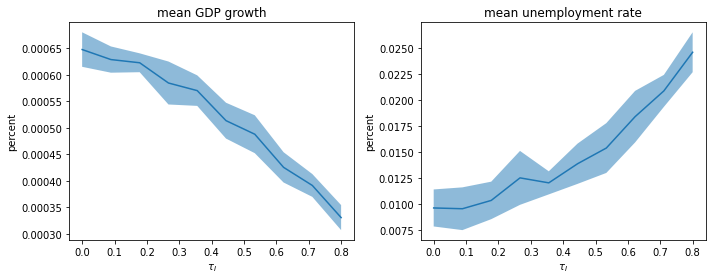

In [5]:
n_plot(
    'income', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_I$', '$\\tau_I$']
)

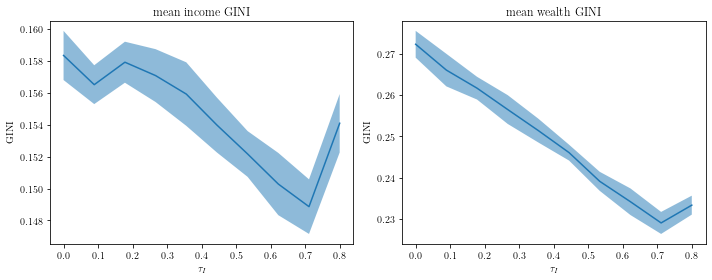

In [80]:
n_plot(
    'income', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_I$', '$\\tau_I$']
)

## Profit tax

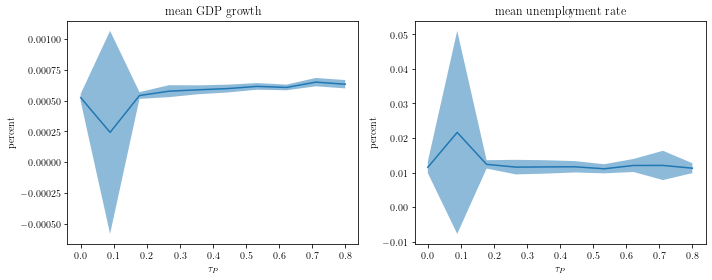

In [81]:
n_plot(
    'profit', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_P$', '$\\tau_P$']
)

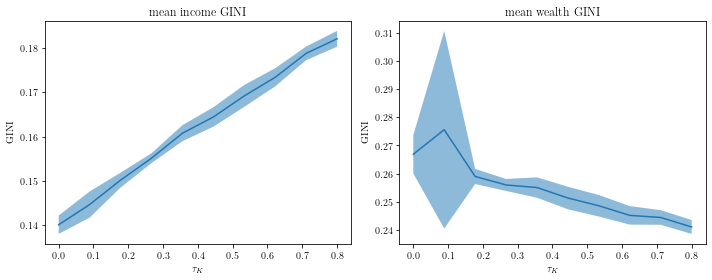

In [82]:
n_plot(
    'profit', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_K$', '$\\tau_K$']
)

## Capital Tax

In [1]:
n_plot(
    'capital', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_K$', '$\\tau_K$']
)

NameError: name 'n_plot' is not defined

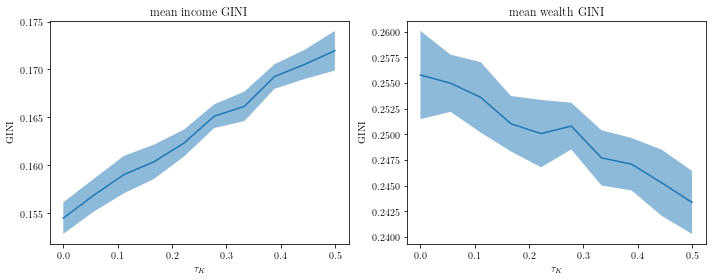

In [84]:
n_plot(
    'capital', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_K$', '$\\tau_K$']
)

## Carbon Tax

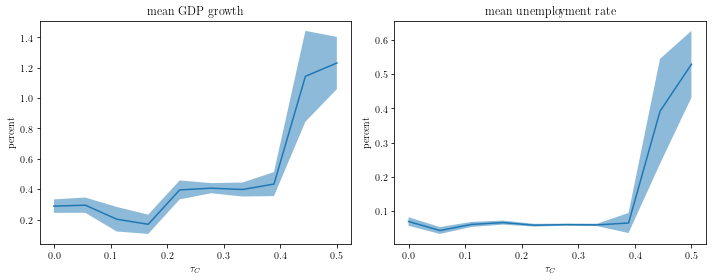

In [6]:
n_plot(
    'carbon', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_C$', '$\\tau_C$']
)

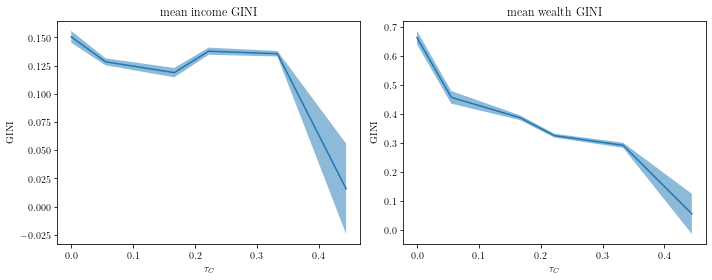

In [26]:
n_plot(
    'carbon', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_C$', '$\\tau_C$']
)

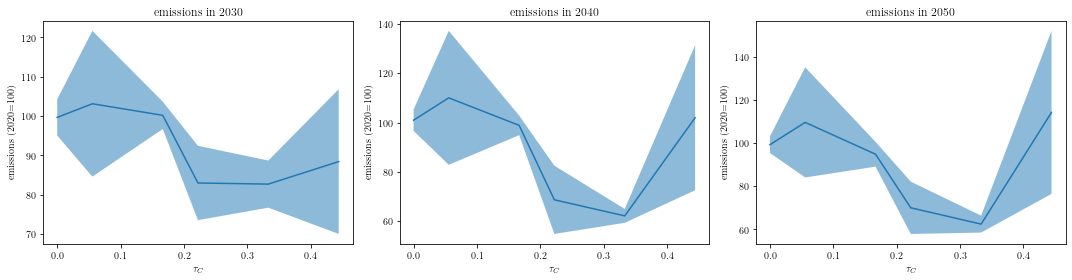

In [27]:
n_plot(
    'carbon', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_C$', '$\\tau_C$', '$\\tau_C$'],
    n=3
)

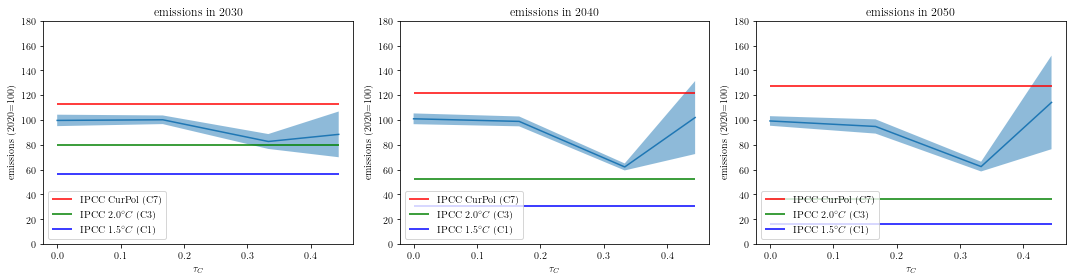

In [21]:
n_plot_hlines(
    'carbon', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_C$', '$\\tau_C$', '$\\tau_C$'],
    [[112.72727273, 121.81818182, 127.27272727],
     [80., 52.72727273, 36.36363636],
     [56.36363636, 30.90909091, 16.36363636]],
    ['IPCC CurPol (C7)', 'IPCC $2.0^\circ C$ (C3)', 'IPCC $1.5^\circ C$ (C1)'],
    ['red', 'green', 'blue'],
    n=3,
    ylims=[(0, 180), (0, 180), (0, 180)],
    filename='carbontax_emissions.pdf'
)

## Sales tax

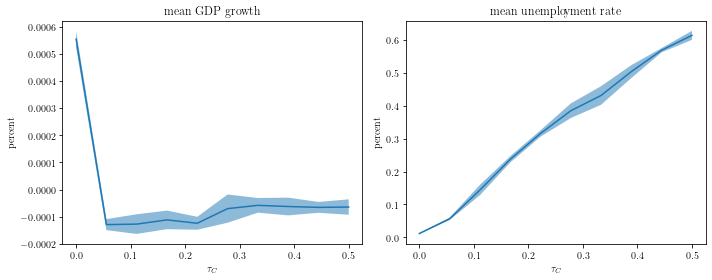

In [89]:
n_plot(
    'sales', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_C$', '$\\tau_C$']
)

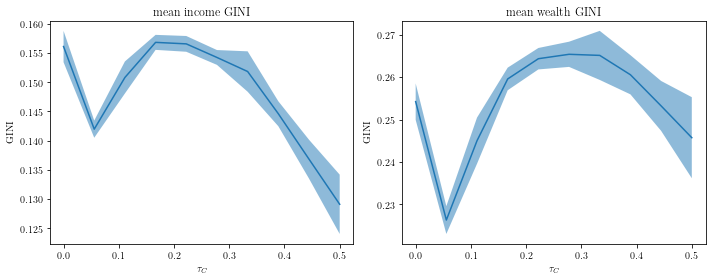

In [90]:
n_plot(
    'sales', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_C$', '$\\tau_C$']
)

## Energy tax

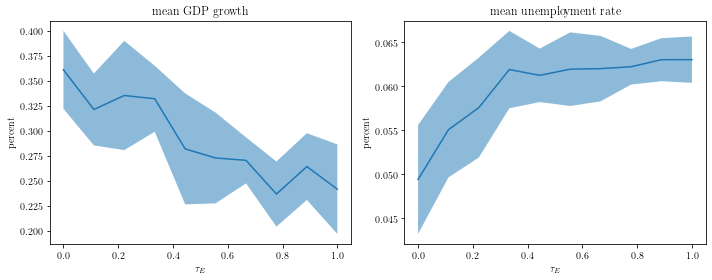

In [6]:
n_plot(
    'energy', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_E$', '$\\tau_E$']
)

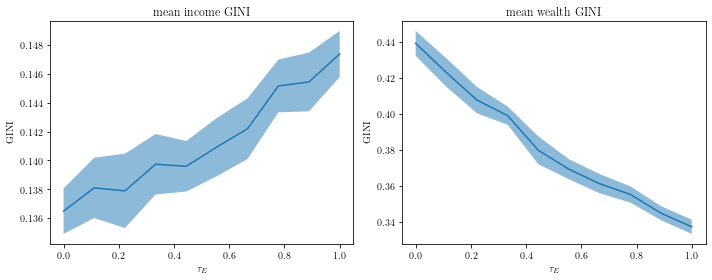

In [7]:
n_plot(
    'energy', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_E$', '$\\tau_E$']
)

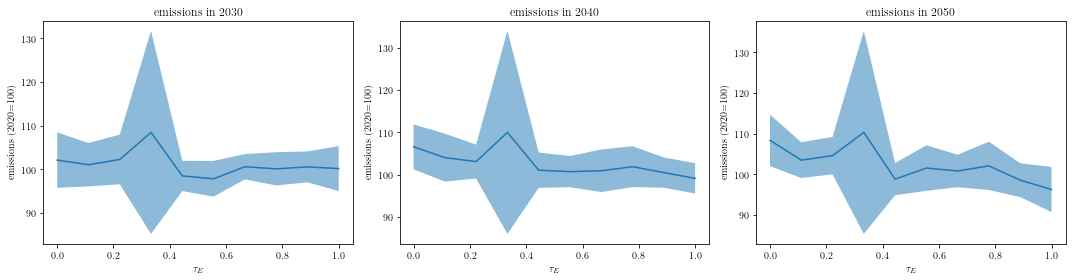

In [8]:
n_plot(
    'energy', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_E$', '$\\tau_E$', '$\\tau_E$'],
    n=3
)

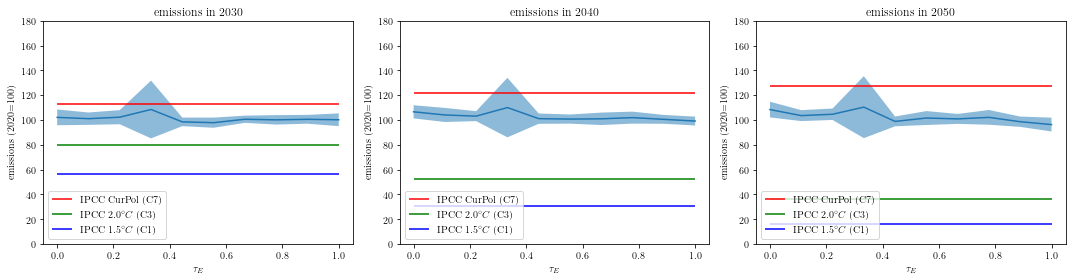

In [9]:
n_plot_hlines(
    'energy', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_E$', '$\\tau_E$', '$\\tau_E$'],
    [[112.72727273, 121.81818182, 127.27272727],
     [80., 52.72727273, 36.36363636],
     [56.36363636, 30.90909091, 16.36363636]],
    ['IPCC CurPol (C7)', 'IPCC $2.0^\circ C$ (C3)', 'IPCC $1.5^\circ C$ (C1)'],
    ['red', 'green', 'blue'],
    n=3,
    ylims=[(0, 180), (0, 180), (0, 180)],
    filename='energytax_emissions.pdf'
)

In [53]:
df_tax = pd.read_csv('../results/experiments/OFAT_experiments/carbontax_0.4_1.csv')
df_notax = pd.read_csv('../results/validation/validation_samples/valoutput_1.csv')

df_notax.shape
# df_tax.head()

(660, 31)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


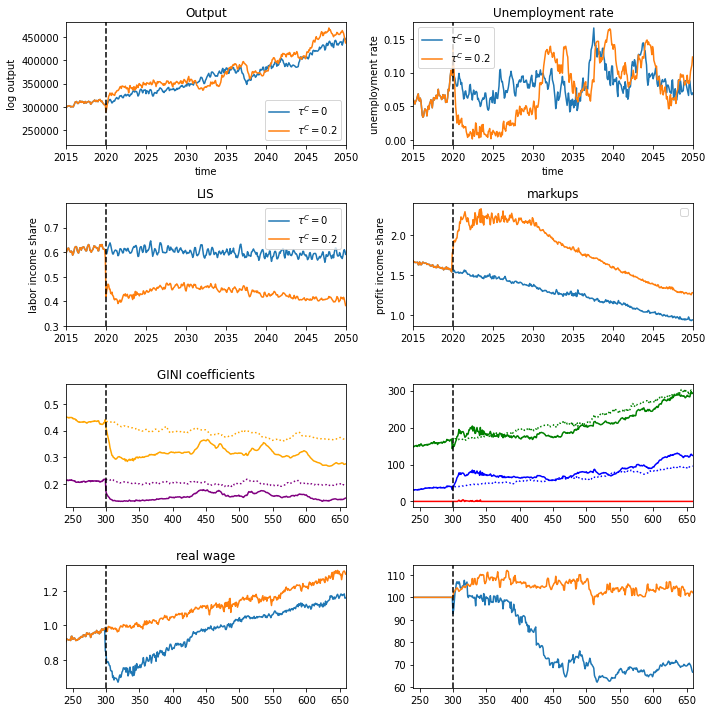

In [38]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(10,10))

# ax1.plot(np.log(df_notax.total_Q_cp + df_notax.total_Q_kp), label='$\\tau^C=0$')
# ax1.plot(np.log(df_tax.total_Q_cp + df_tax.total_Q_kp), label='$\\tau^C=0.2$')
ax1.plot(df_notax.total_Q_cp + df_notax.total_Q_kp, label='$\\tau^C=0$')
ax1.plot(df_tax.total_Q_cp + df_tax.total_Q_kp, label='$\\tau^C=0.2$')
ax1.set_xlim(240,660)
ax1.set_xticks(np.arange(240, 661, 60), np.arange(2015, 2051, 5))
ax1.set_xlabel('time')
ax1.axvline(300, c='black', linestyle='dashed')
ax1.set_ylabel('log output')
ax1.set_title('Output')
ax1.legend()

ax2.plot(df_notax.U, label='$\\tau^C=0$')
ax2.plot(df_tax.U, label='$\\tau^C=0.2$')
ax2.axvline(300, c='black', linestyle='dashed')
ax2.set_xticks(np.arange(240, 661, 60), np.arange(2015, 2051, 5))
ax2.set_xlim(240,660)
ax2.set_ylabel('unemployment rate')
ax2.set_xlabel('time')
ax2.set_title('Unemployment rate')
ax2.legend()

# ax3.plot(df_notax.gini_W)
# ax3.plot(df_tax.gini_W)
# ax3.plot(df_notax.gini_I)
# ax3.plot(df_tax.gini_I)
ax3.plot(df_notax.LIS, label='$\\tau^C=0$')
ax3.plot(df_tax.LIS, label='$\\tau^C=0.2$')
ax3.set_xticks(np.arange(240, 661, 60), np.arange(2015, 2051, 5))
ax3.axvline(300, c='black', linestyle='dashed')
ax3.set_ylabel('labor income share')
ax3.set_title('LIS')
ax3.set_xlim(240,660)
ax3.legend()


# ax4.plot((df_notax.GDP_cp + df_notax.GDP_kp) / df_notax.GDP)
# ax4.plot((df_tax.GDP_cp + df_tax.GDP_kp) / df_tax.GDP)
# ax4.plot(df_notax.markups, label='$\\tau^C=0$')
# ax4.plot(df_tax.markups, label='$\\tau^C=0.2$')
ax4.plot(df_notax.prices)
ax4.plot(df_tax.prices)
ax4.set_xticks(np.arange(240, 661, 60), np.arange(2015, 2051, 5))
ax4.axvline(300, c='black', linestyle='dashed')
ax4.set_ylabel('profit income share')
ax4.set_title('markups')
ax4.legend()
ax4.set_xlim(240,660)

ax5.plot(df_tax.GINI_I, c='purple')
ax5.plot(df_tax.GINI_W, c='orange')
ax5.plot(df_notax.GINI_I, c='purple', linestyle='dotted')
ax5.plot(df_notax.GINI_W, c='orange', linestyle='dotted')
ax5.set_title('GINI coefficients')
ax5.axvline(300, c='black', linestyle='dashed')
ax5.set_xlim(240, 660)

ax6.plot(df_tax.W_min / df_tax.prices, color='red')
ax6.plot(df_tax.W_20 / df_tax.prices, c='blue')
ax6.plot(df_tax.W_80 / df_tax.prices, c='green')
ax6.axvline(300, c='black', linestyle='dashed')
# ax6.plot(df_notax.W_min / df_notax.prices, c='red', linestyle='dotted')
ax6.plot(df_notax.W_20 / df_notax.prices, c='blue', linestyle='dotted')
ax6.plot(df_notax.W_80 / df_notax.prices, c='green', linestyle='dotted')
# ax6.plot(df_tax.W_min, color='red')
# ax6.plot(df_tax.W_20, c='blue')
# ax6.plot(df_tax.W_80, c='green')
# ax6.axvline(300, c='black', linestyle='dashed')
# # ax6.plot(df_notax.W_min, c='red', linestyle='dotted')
# ax6.plot(df_notax.W_20, c='blue', linestyle='dotted')
# ax6.plot(df_notax.W_80, c='green', linestyle='dotted')
ax6.set_xlim(240, 660)

ax7.plot(df_tax.wages / df_tax.prices)
ax7.plot(df_notax.wages / df_notax.prices)
# ax7.plot(df_tax.wages)
# ax7.plot(df_notax.wages)
ax7.set_title('real wage')
ax7.set_xlim(240, 660)
ax7.axvline(300, c='black', linestyle='dashed')

# ax8.plot(df_tax.markups)
# ax8.plot(df_notax.markups)
# ax8.plot(df_tax.p_avg_cp)
# ax8.plot(df_notax.p_avg_cp)

ax8.plot(df_tax.EmIndex)
ax8.plot(df_notax.EmIndex)
ax8.set_xlim(240, 660)
ax8.axvline(300, c='black', linestyle='dashed')

plt.tight_layout()
plt.show()

In [85]:
df_hh_notax = pd.read_csv('../results/validation/validation_samples/householddata_1.csv')
df_hh_tax = pd.read_csv('../results/experiments/OFAT_experiments/carbontax_householddata_0.4_1.csv')

In [86]:
df_hh_notax.head()

,I_med_20,I_mean_20,I_med_80,I_mean_80,W_med_20,W_mean_20,W_med_80,W_mean_80
0,102.668460,104.821598,167.621388,173.015224,28.885127,26.129944,125.432542,137.295137
1,109.059263,108.720245,169.930189,174.725660,25.384062,26.626804,125.065945,136.960858
2,113.929089,113.211200,172.569557,176.893231,26.353212,28.945780,126.010905,137.362740
3,116.067367,116.192915,172.656240,177.226943,31.486687,32.546926,128.005515,138.325594
4,117.547881,117.749458,171.971321,176.288970,34.559512,35.586003,126.590678,137.343815


In [87]:
df_hh_tax.shape

(361, 8)

In [88]:
t_start = 299

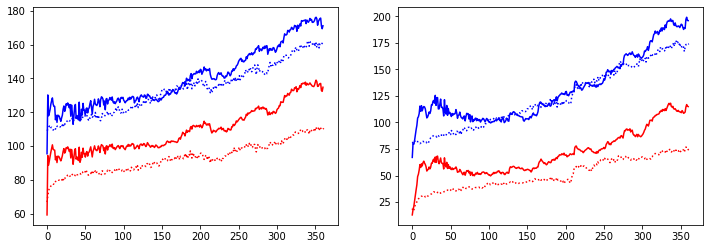

In [89]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(df_hh_notax.I_med_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='red', linestyle='dotted')
ax1.plot(df_hh_tax.I_med_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy(),
         color='red')
ax1.plot(df_hh_notax.I_med_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='blue', linestyle='dotted')
ax1.plot(df_hh_tax.I_med_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='blue')

ax2.plot(df_hh_notax.W_med_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='red', linestyle='dotted')
ax2.plot(df_hh_tax.W_med_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='red')

ax2.plot(df_hh_notax.W_med_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='blue', linestyle='dotted')
ax2.plot(df_hh_tax.W_med_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='blue')

plt.show()

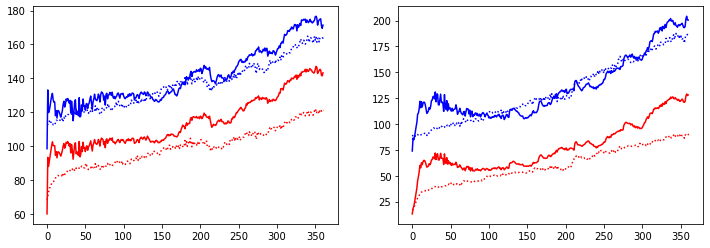

In [90]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(df_hh_notax.I_mean_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='red', linestyle='dotted')
ax1.plot(df_hh_tax.I_mean_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy(),
         color='red')
ax1.plot(df_hh_notax.I_mean_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='blue', linestyle='dotted')
ax1.plot(df_hh_tax.I_mean_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='blue')

ax2.plot(df_hh_notax.W_mean_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='red', linestyle='dotted')
ax2.plot(df_hh_tax.W_mean_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='red')

ax2.plot(df_hh_notax.W_mean_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='blue', linestyle='dotted')
ax2.plot(df_hh_tax.W_mean_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='blue')

plt.show()

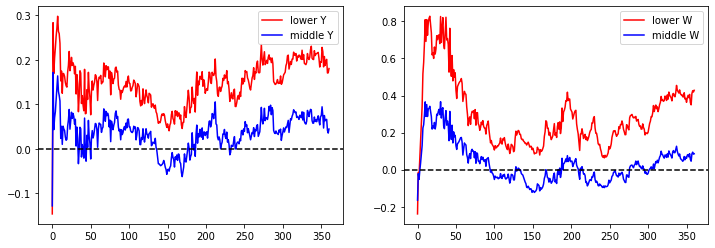

In [94]:
real_W_20_notax = df_hh_notax.W_mean_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy()
real_W_20_tax = df_hh_tax.W_mean_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy()

real_W_80_notax = df_hh_notax.W_mean_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy()
real_W_80_tax = df_hh_tax.W_mean_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy()

real_I_20_notax = df_hh_notax.I_mean_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy()
real_I_20_tax = df_hh_tax.I_mean_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy()

real_I_80_notax = df_hh_notax.I_mean_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy()
real_I_80_tax = df_hh_tax.I_mean_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy()

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(real_I_20_tax / real_I_20_notax[1:] - 1, label='lower Y', c='red')
ax1.plot(real_I_80_tax / real_I_80_notax[1:] - 1, label='middle Y', c='blue')
ax1.axhline(0, linestyle='dashed', color='black')
ax1.legend()

ax2.plot(real_W_20_tax / real_W_20_notax[1:] - 1, label='lower W', c='red')
ax2.plot(real_W_80_tax / real_W_80_notax[1:] - 1, label='middle W', c='blue')
ax2.axhline(0, linestyle='dashed', color='black')
ax2.legend()

plt.show()